# **Apple and Google Products Twitter Sentiment Analysis**  

---
**Authors:**

1. Elvis Wanjohi (Team Leader)

2. Jessica Gichimu

3. Jesse Ngugi

4. Stephen Gachingu

5. Latifa Riziki

---

## **1. Business Understanding**   

### 1.1 Business Overview

Apple and Google are global technology companies which offer a variety of electronic products and software services. Like any big company, there is public opinion of the products and services they bring to the market. As leaders in the competitive tech industry, their operations depend heavily on customer satisfaction and public perception of their brands.

Customer sentiment plays a key role for both companies. Negative opinions expressed online can affect brand image and influence purchasing decisions. By analyzing customer feedback from social media platforms such as Twitter, these companies can gain insights into how users feel about their products and services. This can help identify areas for improvement, respond to customer concerns and strengthen their brand reputation.

---

### 1.2 Problem Statement

Apple and Google’s success rely heavily on maintaining strong customer satisfaction and positive public perception. With users actively sharing opinions on Twitter, analyzing this feedback has become important for improving products and strengthening brand reputation.

The main challenge is effectively analyzing this data to understand customer sentiment. To address this, this project builds a sentiment analysis model that classifies tweets about Apple and Google products into positive, negative or neutral categories. 

---

### 1.3 Business Objective

#### 1.3.1 Main Objective 

The main objective of this project is to develop a sentiment classification model that analyzes tweets about Apple and Google products and classifies them as positive, negative or neutral.

#### 1.3.2 Specific Objectives

The specific objectives of the project are:

1. Determine the products and services from Apple or Google that have the largest negative, positive and neutral feedback.

2. Preprocess the data through processes such as; Vectorization and tokenization, handling missing values and creating new features with respect to user behavior.

3. Evaluate the model performance using Precison, Recall, F1score, Accuracy Score and Roc.

4. Identify the most signficant features and important tokens.

5. Compare different classification models to determine which performs best for this dataset.

#### 1.3.3 Research Questions

1. Which products and services from Apple or Google have the largest negative, positive and neutral feedback?

2. Which features influence user behavior?

3. Which classifier model had the best Precison, Recall,F1 score, Accuracy score and ROC?

4. Which classification model performs best for this dataset?

---

### 1.5 Success Criteria  

The success of this project will be assessed in the following ways:

1. It should generate insights into how users feel about their products and services.

2. A machine learning model should be successfully developed that automatically determines the sentiment of a tweet based on words and tone used in the text.

 
---

## **2. Data Understanding**

This section introduces the Twitter sentiment dataset used for the project. The dataset contains tweets about Apple and Google products, forming the basis for building a sentiment classification model.

The aim is to understand the structure and content of the dataset. This involves reviewing the available features, checking their data types and identifying potential issues such as missing values or inconsistencies.

By exploring the data at this stage, it is possible to detect quality concerns early and begin considering how the dataset can best be prepared for text cleaning, preprocessing and model development.

### 2.1 Importing Required Libraries

The necessary Python libraries for data handling, visualization and modeling are imported. These include Pandas, NumPy, Seaborn, Matplotlib, Plotly, Scikit-learn, Imbalanced-learn, NLTK and Regex for text preprocessing and analysis.

In [84]:
# Import required libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Text preprocessing and NLP
import nltk
import re
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
from IPython.display import Image, display

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Model interpretation and saving
import lime
import lime.lime_text
import joblib
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### 2.1.2. Data Loading and Inspection

In this section, the Twitter sentiment dataset is loaded from a CSV file into a Pandas DataFrame. Basic inspection functions are applied to confirm successful loading and to preview the structure of the dataset before proceeding with further analysis.

In [85]:
# Load the dataset
data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Each row in the dataset represents a tweet posted by a user. The columns include:

- tweet_text: The text content of the tweet used for sentiment classification.

- emotion_in_tweet_is_directed_at: The target of the emotion expressed in the tweet (e.g., Apple or Google).

- is_there_an_emotion_directed_at_a_brand_or_product: Indicates whether the tweet expresses an emotion directed at a brand or product. This serves as the target label for classification.

This information provides the foundation for analyzing user sentiments toward different brands and for developing sentiment classification models.

In [86]:
# Check the shape of the dataset
data.shape

(9093, 3)

- The dataset has 9093 rows and 3 columns.

In [87]:
# Display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- All the columns in the dataset are non null.

- All the columns are of the object data type.

In order to understand the columns better, and for ease of readability, the columns are renamed to give the data more meaning.

In [88]:
# Rename the columns in the dataset
def rename_columns(df):
    df.columns = ['tweet', 'tweet_directed_at', 'sentiment']
    return df

data = rename_columns(data)
data.head()

,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In the sentiment column, it is possible to check the different classes (sentiments) and their respective counts.

In [89]:
# Check the unique values in 'sentiment'
data['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- The dataset contains four sentiment categories: Positive emotion, Negative emotion, No emotion toward the brand or product and I can’t tell.

- The last two are merged into a single Neutral emotion category, resulting in three final classes: Positive, Negative and Neutral.

In [90]:
# Combine the 'No emotion toward brand or product' and 'I can't tell' into a single category
data['sentiment'] = data['sentiment'].replace(
    {
        "No emotion toward brand or product": "Neutral emotion",
        "I can't tell": "Neutral emotion",
    }
)

# Check the unique values in the sentiment column
print("Unique Sentiments:")
print(data['sentiment'].unique())

Unique Sentiments:
['Negative emotion' 'Positive emotion' 'Neutral emotion']


Next, missing values and duplicate values are checked in the dataset.

In [91]:
# Check for missing values and express as a percentage
missing_values = data.isna().sum() / len(data) * 100
print("Missing Values (%):")
print(missing_values)

Missing Values (%):
tweet                 0.010997
tweet_directed_at    63.807324
sentiment             0.000000
dtype: float64


- The tweet_directed_at column has numerous missing values. They are replaced with the string 'Not directed' to show that those tweets are not directed at any specific entity.

In [92]:
# Fill the missing values in 'tweet_directed_at' column with 'Not directed'
data['tweet_directed_at'].fillna('Not directed', inplace=True)

# Drop the missing value in 'tweet' column
data.dropna(subset=['tweet'], inplace=True, axis=0)

# Check again for missing values
data.isna().sum()

tweet                0
tweet_directed_at    0
sentiment            0
dtype: int64

Next, duplicate rows in the dataset are checked.

In [93]:
# Check for duplicate values
data.duplicated().sum()

22

- There are 22 duplicate rows in the dataset. The duplicate rows are dropped entirely.

In [94]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

Next, the summary statistics of the data are checked.

In [95]:
data.describe()

,tweet,tweet_directed_at,sentiment
count,9070,9070,9070
unique,9065,10,3
top,RT @mention RT @mention It's not a rumor: Appl...,Not directed,Neutral emotion
freq,2,5788,5531


### 2.3. Exploratory Data Analysis

This section investigates the dataset to get insights, evaluate feature distributions, assess relationships and detect issues or outliers. The findings guide the selection of appropriate modeling techniques.

#### 2.3.1. Dataset Overview

This section covers the general overview of the dataset. This includes the shape, number of tweets, number of features and column info.

In [96]:
# Dataset overview
print("Dataset Overview")
print(f"Dataset shape: {data.shape}")
print(f"Number of tweets: {len(data)}")
print(f"Number of features: {len(data.columns)}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
for col in data.columns:
    print(f"• {col}: {data[col].dtype}")

Dataset Overview
Dataset shape: (9070, 3)
Number of tweets: 9070
Number of features: 3
Memory usage: 2.75 MB

Column Information:
• tweet: object
• tweet_directed_at: object
• sentiment: object


#### 2.3.2. Sentiment Distribution Analysis

In this section, the distribution of the unique values in the sentiment column is inspected.

In [97]:
# Sentiment Distribution Analysis
print("Sentiment Distribution Analysis")

# Count unique sentiment values
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment Categories:")
print(sentiment_counts)

# Calculate percentages
sentiment_percentages = data['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_percentages.round(2))

Sentiment Distribution Analysis

Sentiment Categories:
sentiment
Neutral emotion     5531
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
Neutral emotion     60.98
Positive emotion    32.75
Negative emotion     6.27
Name: proportion, dtype: float64


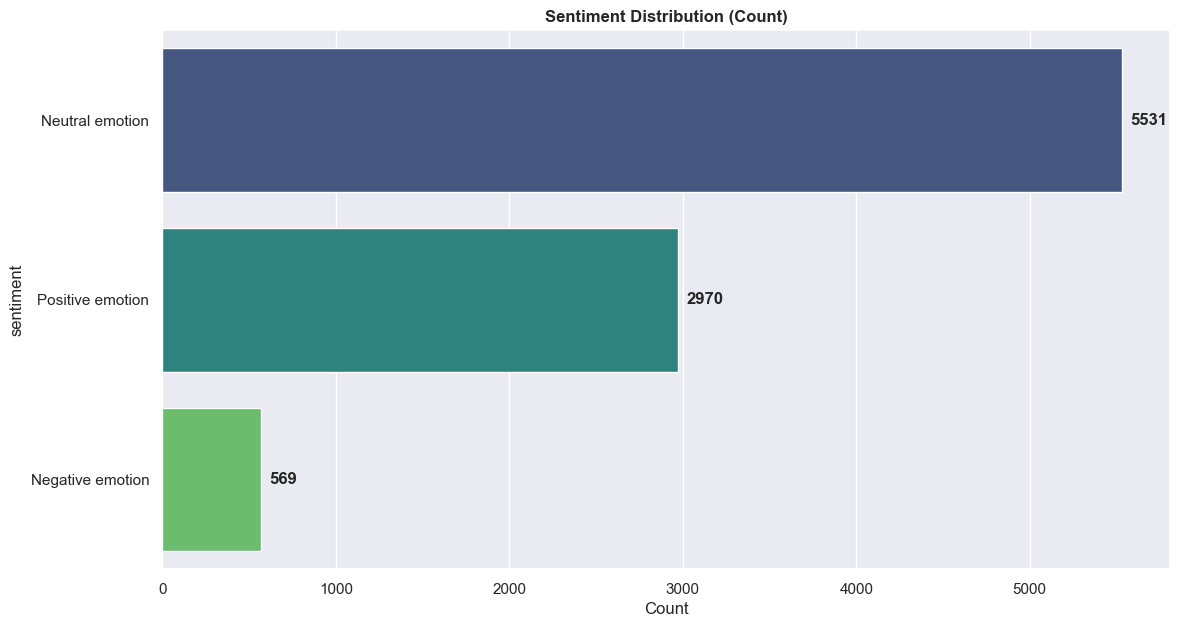

In [98]:
# Visualize sentiment distribution
plt.figure(figsize=(13, 7))

# Plot 1: Count Plot

# plt.subplot(2, 3, 1)
ax = sns.countplot(data=data, y='sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(sentiment_counts.values):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

From the plot, the following were the key observations:

- Out of the 9070 tweets in the dataset, 5531 tweets express a neutral emotion. This is about 60.98% of the total tweets, 2970 tweets express a positive emotion, which is about 32.75% of the total tweets and 569 tweets express a negative emotion, which is about 6.27% of the total tweets.

- This indicates that the sentiment (target) column is highly imbalanced. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, the class imbalance will be handles before modeling.

#### 2.3.3. Tweet Destination distribution

This section examines how tweets are distributed across different brands and products. The analysis helps identify which entities receive the most social media attention, reveals sentiment patterns by brand, assesses data balance, provides competitive insights between Apple and Google, and highlights brands or products that may require deeper sentiment analysis.

These insights will guide the modeling approach and support actionable business insights for brand management and product development strategies.

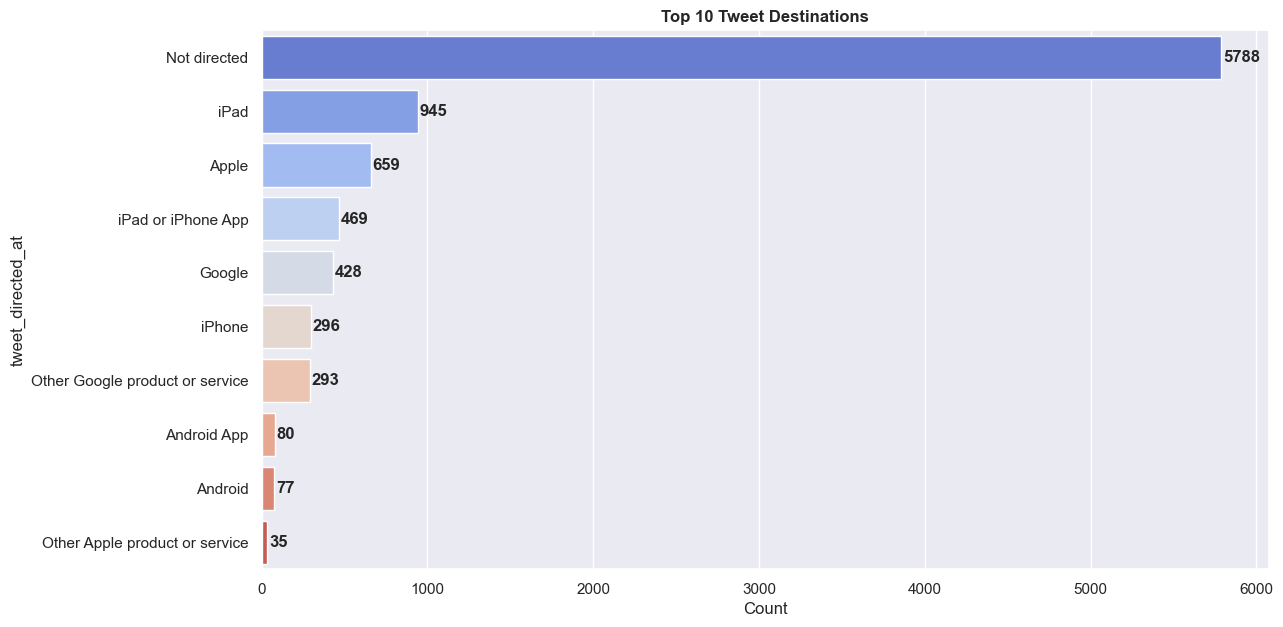

In [99]:
# Plot 2: Tweet Destination Distribution

plt.figure(figsize=(13, 7))
tweet_dest_counts = data['tweet_directed_at'].value_counts().head(10)
ax = sns.barplot(x=tweet_dest_counts.values, y=tweet_dest_counts.index, palette='coolwarm')
plt.title('Top 10 Tweet Destinations', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(tweet_dest_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')

The following were the key observations:

- The plot shows that most tweets are not directed at any specific brand, with 'Not directed' being the largest category.

- Among the directed tweets, 'iPad', 'Apple', and 'iPad or iPhone App' are the most mentioned, followed by 'Google' and 'iPhone'.

- This shows that Apple products dominate discussions, while Google products receive fewer mentions, highlighting a strong focus on Apple within the top tweet destinations.

#### 2.3.4. Sentiment by Tweet Destination

This section examines how sentiment is distributed across major brands and products such as Apple, Google, iPhone and iPad. It shows the share of positive, negative and neutral tweets for each destination to reveal how each brand is perceived by users.

The analysis helps to:

- Compare sentiment levels across brands and products.

- Identify which entities receive more positive or negative feedback.

- Provide insights that can support marketing and communication decisions.

This step shows a clear view of brand sentiment. It shows areas where each brand performs well and where improvement may be needed.

In [100]:
# Plot 4: Sentiment by Tweet Destination using Plotly

# Prepare data
top_destinations = data['tweet_directed_at'].value_counts().head(5).index
filtered_df = data[data['tweet_directed_at'].isin(top_destinations)]
sentiment_destination = pd.crosstab(filtered_df['tweet_directed_at'], filtered_df['sentiment'])

# Create stacked bar chart
fig = go.Figure()

for sentiment in sentiment_destination.columns:
    fig.add_trace(go.Bar(
        x=sentiment_destination.index,
        y=sentiment_destination[sentiment],
        name=sentiment,
        text=sentiment_destination[sentiment],
        textposition='auto'
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment by Top 5 Destinations',
    xaxis_title='Tweet Destination',
    yaxis_title='Count',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

The following were the key observations:

- Not directed category has the highest count with 5,431 neutral tweets. This shows that many tweets are general rather than brand specific.

- Among directed destinations, iPad with 792 and Apple with 541 record the most mentions, followed by iPad or iPhone App (396) and Google (344).

- Positive sentiment is dominant across directed destinations, while negative sentiment is minimal.

- This shows that Apple products attract the most engagement and has more favourable sentiment.

In [101]:
# Plot 5: Sentiment Proportions by Destination

# Create percentage data from the crosstab
sentiment_dest_pct = sentiment_destination.div(sentiment_destination.sum(axis=1), axis=0) * 100

# Define custom colors for each sentiment
sentiment_colors = {
    'Positive emotion': '#2ecc71',   # green
    'Negative emotion': '#e74c3c',   # red
    'Neutral emotion':  '#f1c40f'    # yellow
}

fig = go.Figure()

for sentiment in sentiment_dest_pct.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest_pct.index,
        y=sentiment_dest_pct[sentiment],
        name=sentiment,
        text=sentiment_dest_pct[sentiment].round(1).astype(str) + '%',
        textposition='auto',
        marker_color=sentiment_colors.get(sentiment, None)
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment Proportions by Destination',
    xaxis_title='Tweet Destination',
    yaxis_title='Percentage',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

This plot shows the percentage distribution of positive, neutral and negative sentiments across the top five tweet destinations:

- Apple, iPad, and iPad or iPhone App show strong positive sentiment, exceeding 80%.

- Google also records high positivity at about 80% but slightly higher negative and neutral shares than Apple destinations.

- Not directed tweets are mostly neutral at 93.8%, showing minimal sentiment variation.

- This shows that tweets targeting Apple and Google products highlight favourable public perception, while non-targeted tweets remain mostly neutral.

#### 2.3.5 Tweet Length Distribution by Sentiment

This section shows the distribution of tweet lengths (measured in number of characters) across the three sentiment categories: Positive, Negative and Neutral.

The boxplot below illustrates the median, quartiles and outliers within each sentiment class to identify potential differences in how users express their opinions. Analyzing tweet length by sentiment helps determine whether certain emotions are conveyed through shorter or longer tweets.

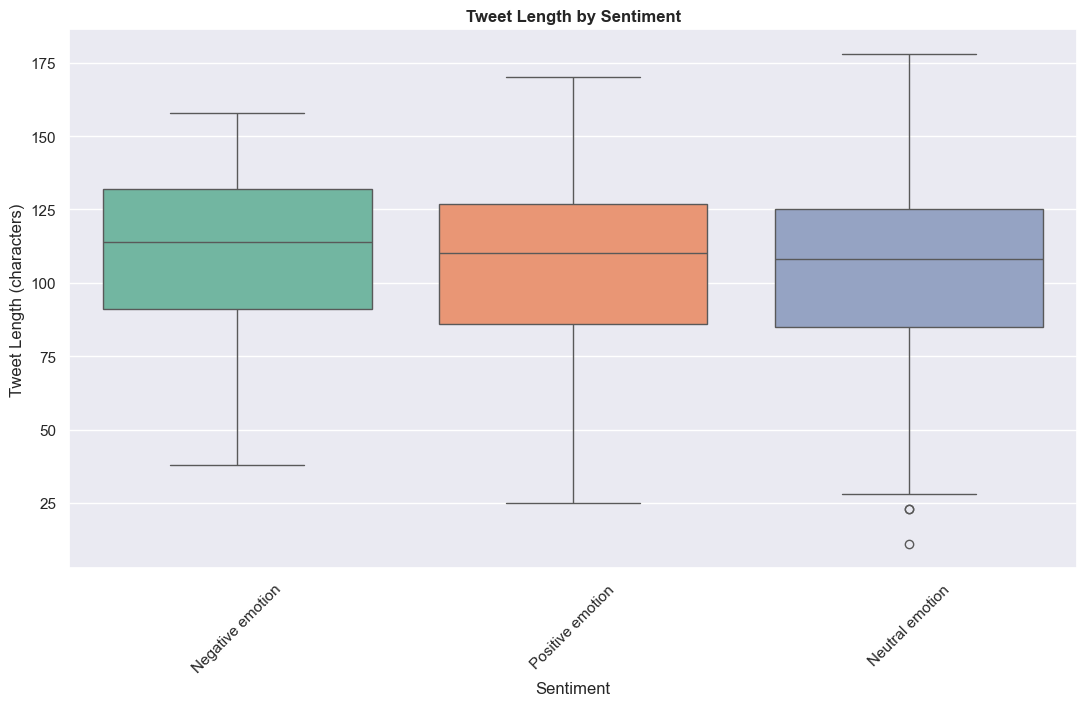

In [102]:
# Plot 6: Tweet Length Distribution by Sentiment

plt.figure(figsize=(13, 7))
data['tweet_length'] = data['tweet'].str.len()
sns.boxplot(data=data, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)
plt.show();

The boxplot above shows the distribution of tweet lengths (in number of characters) across the three sentiment categories: Positive, Negative and Neutral.

- Neutral tweets has a wider range of lengths. The median length remains consistent across all sentiment groups.

- Outliers with longer tweet lengths are present within each sentiment category.

- The tweet length shows little variation across sentiments. This shows that sentiment type is not strongly associated with tweet length in this dataset.

#### 2.3.6 Distribution of Tweet length/Character, Word and Sentence Counts

This section examines the basic linguistic structure of tweets by analyzing the distribution of character, word and sentence counts. This helps in understanding the length, complexity and composition of tweets across different sentiment categories.

New features such as words and sentences are created to quantify these properties for each tweet. Analyzing the distributions helps to:

- Identify patterns in tweet length and complexity across sentiments.

- Detect differences between sentiment classes, such as whether negative tweets are shorter or more direct.

- Show potential data quality issues. This could include outliers or anomalies in text length.

- Reveal feature engineering opportunities that can improve sentiment classification performance.

These analyses provide a detailed view of the dataset’s linguistic characteristics. This supports more effective preprocessing and model development.

In [103]:
# Feature engineering
def generate_columns(df):
    df['words'] = df['tweet'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
    df['sentences'] = df['tweet'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
    return df
data = generate_columns(data)
data.head()

,tweet,tweet_directed_at,sentiment,tweet_length,words,sentences
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,32,5
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,29,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,20,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,21,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,29,1


In [104]:
#renaming tweet length to character
data = data.rename(columns={'tweet_length': 'chars'})

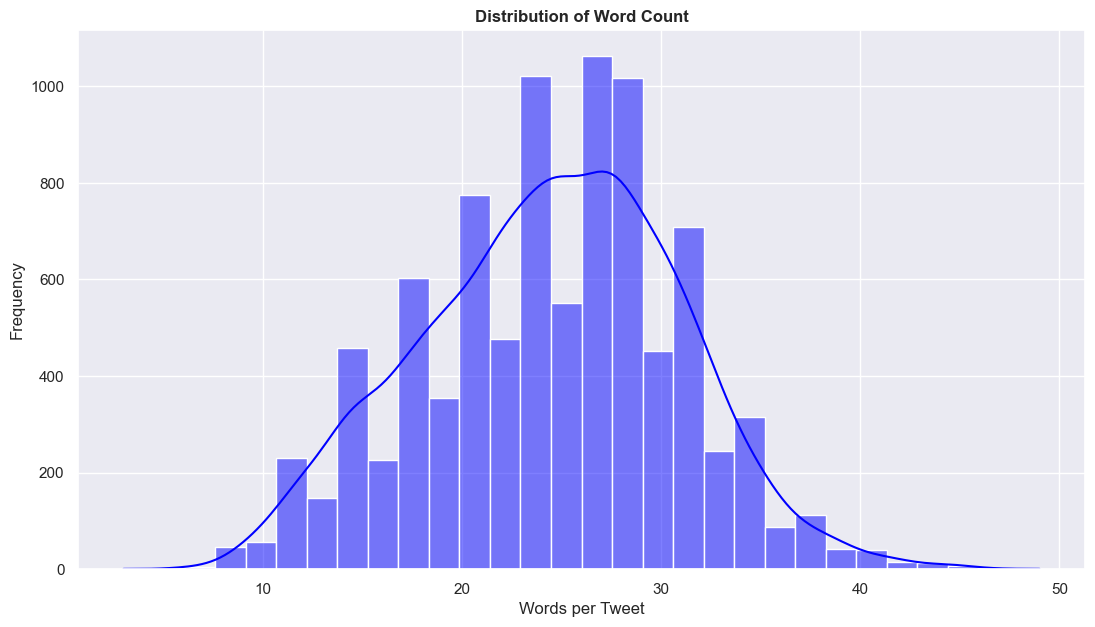

In [105]:
# Plot 7: Word Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='words', bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count', fontweight='bold')
plt.xlabel('Words per Tweet')
plt.ylabel('Frequency')
plt.show();

From the histogram above, the following were observed:

- The data is approximately normally distributed with most tweets containing 20–30 words.

- The distribution is slightly right-skewed. This shows that longer tweets of above 35 words are less frequent than shorter ones.

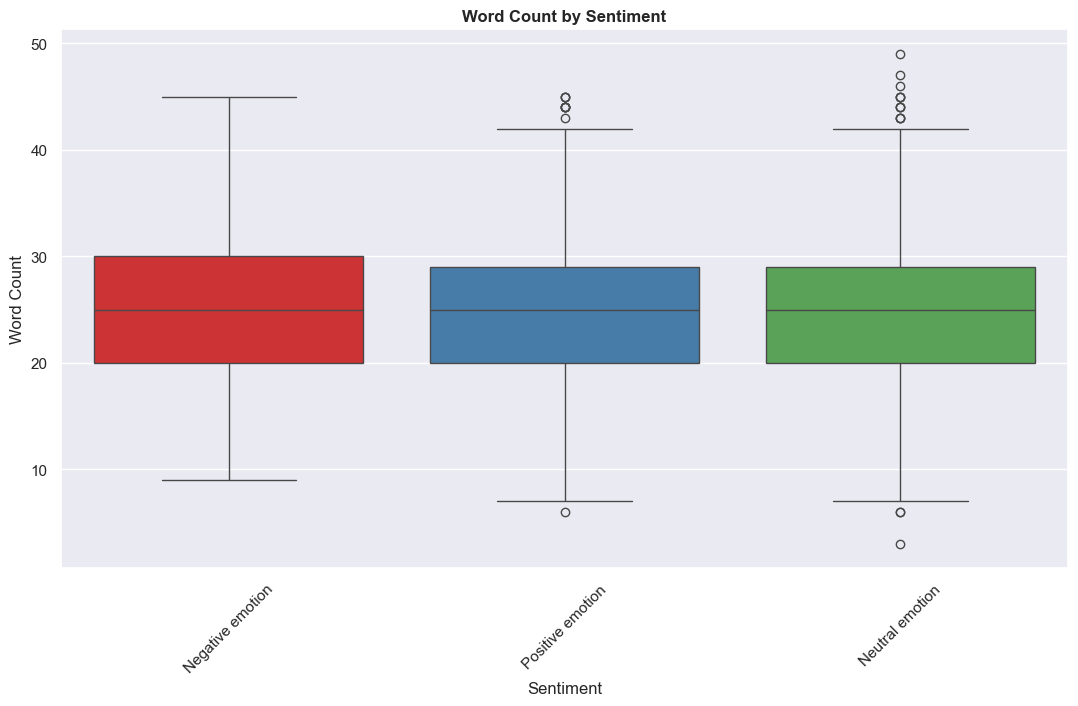

In [106]:
# Plot 8: Word Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='words', palette='Set1')
plt.title('Word Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show();

From the boxplot above, the following were observed:

- Negative and Neutral sentiments have a slightly higher median word count of about 25 words.

- Positive tweets are  shorter on average with about 22 words.

- Positive and Neutral categories contain more outliers. This shows a few unusually long tweets.

- The word count distributions are similar across sentiments with only minor differences in median and spread.

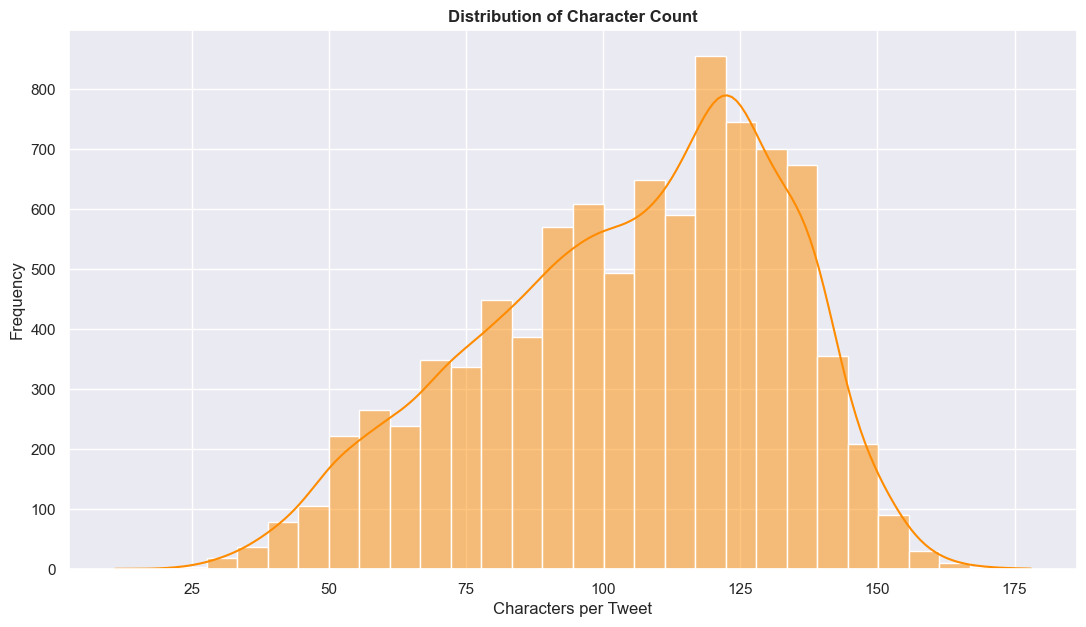

In [107]:
# Plot 9: Character Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='chars', bins=30, kde=True, color='darkorange')
plt.title('Distribution of Character Count', fontweight='bold')
plt.xlabel('Characters per Tweet')
plt.ylabel('Frequency')
plt.show();

From the histogram above, the following were observed:

- Most tweets cluster between 75–150 characters with a peak around 125 characters.

- The density curve reinforces this central tendency showing that users often maximize available space in tweets.

- Very short or very long tweets are few. This shows a preference for mid length and concise messages that fit platform conventions and optimize clarity.

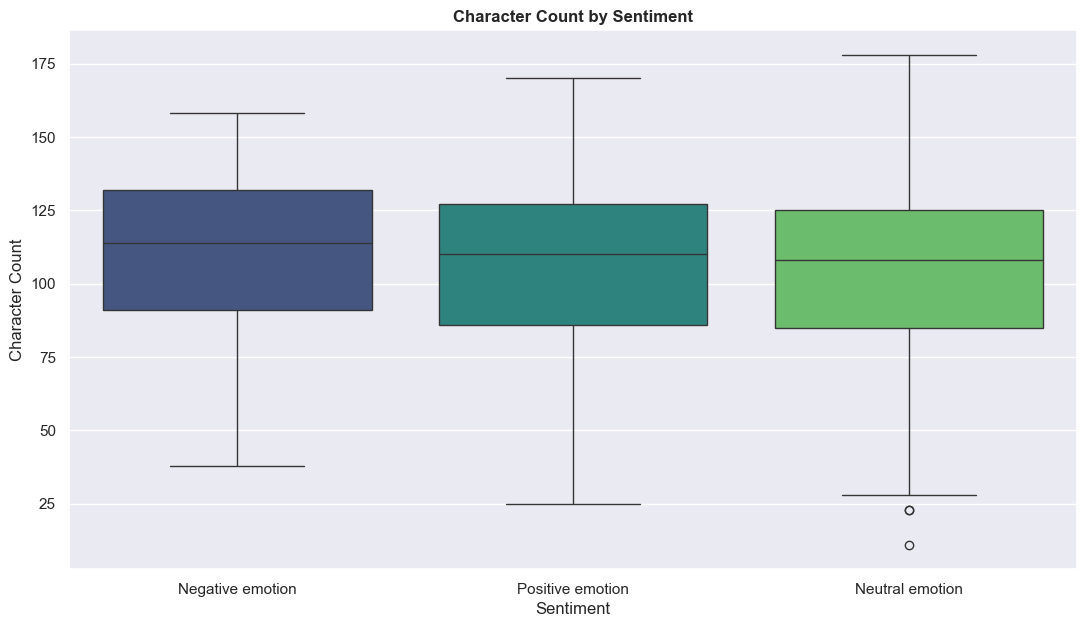

In [108]:
# Plot 10: Character Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='chars', palette='viridis')
plt.title('Character Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Character Count')
plt.show();

The boxplot above shows that:

- Positive and Negative tweets have a similar distribution with a median of about 125 characters and an IQR between 100–150 characters.

- Neutral tweets are shorter with a median of around 100 characters and an IQR of 75–125.

- Two outliers below 25 characters appear in the Neutral category. This shows unusually short tweets.

- Tweets with emotional tone either Positive or Negative tend to be longer, while Neutral tweets are shorter and more variable.

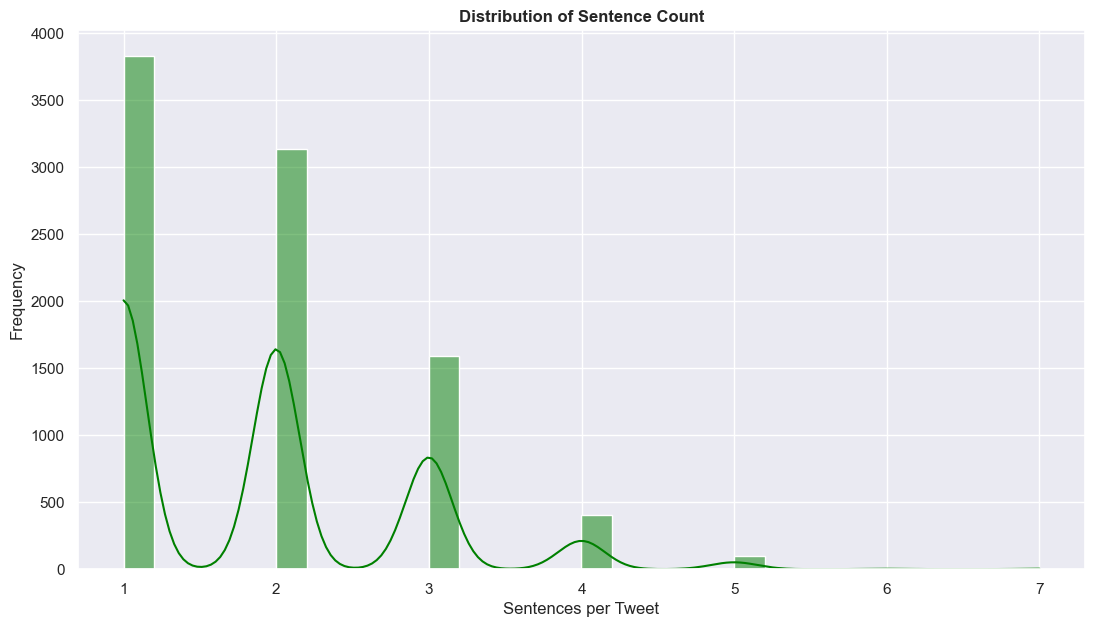

In [109]:
# Plot 11: Sentence Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='sentences', bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Count', fontweight='bold')
plt.xlabel('Sentences per Tweet')
plt.ylabel('Frequency');

From the sentence count distribution above, the following were observed:

- The histogram is right-skewed. This shows that most tweets are short and the frequency decreases as sentence count increases.

- Tweets with 1 or 2 sentences dominate the distribution with over 3,000 tweets. Those with 3 sentences account for around 1,500 tweets after which the count declines.

- The right skew shows that only a few users post tweets containing multiple sentences.

- The density curve confirms the concentration at low sentence counts, peaking near 1 and 2.

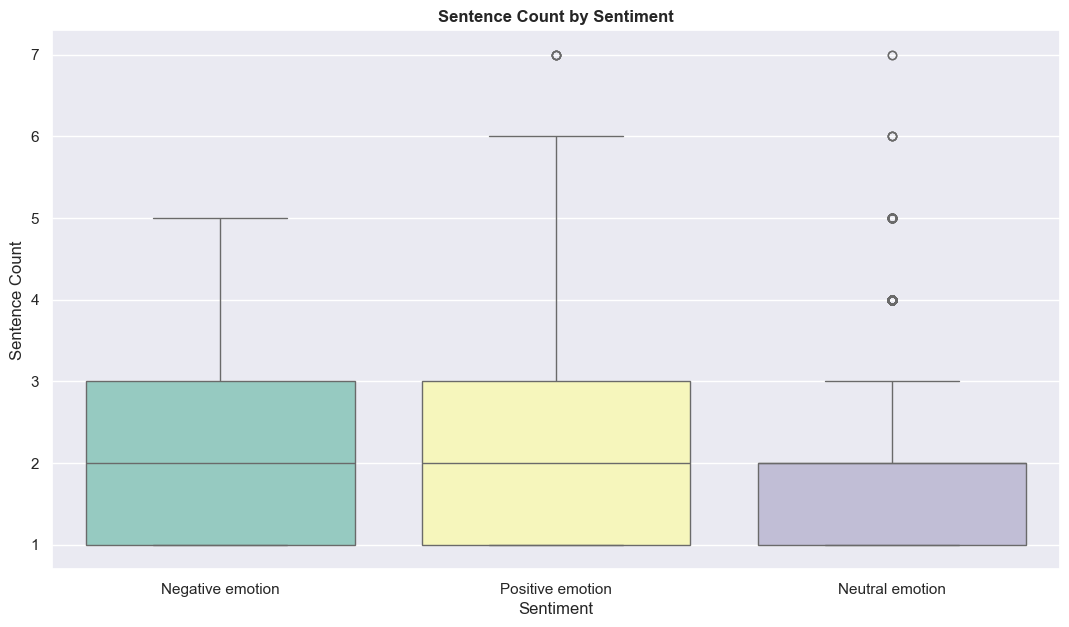

In [110]:
# Plot 12: Sentence Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='sentences', palette='Set3')
plt.title('Sentence Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Count');

The boxplot above shows the distribution of sentence counts across Negative, Positive, and Neutral tweets.

- Negative and Positive tweets share a similar pattern with a median of 3 sentences, an IQR between 2–3 and a few outliers reaching 6–7 sentences.

- Neutral tweets are shorter with a median of 2 sentences, an IQR between 1–2 and several outliers up to 6 sentences.

- Tweets with emotional tone either Positive or Negative tend to be longer while Neutral tweets are shorter and more concise.

## **3. Data Cleaning and Preprocessing**

This section focuses on preparing the dataset for analysis by applying systematic data cleaning, normalization and feature extraction procedures.

The aim is to transform raw, unstructured text into a clean and structured format suitable for effective sentiment classification.

These steps ensure data consistency, reduce noise and enhance the quality of features used for modeling.

The steps include:

- Cleaning: Removes URLs, @mentions and hashtags. It expands contractions, normalizes repeated letters and strips special characters. In addition, it standardizes punctuation and whitespace.

- Normalization: Involves  converting the text data into  a consistent format  by converting all the tweets to  lowercase.

- Stopword Removal: This involves removing words with no significant meaning.

- Tokenization: This involves breaking the texts into smaller words or phrases that the  model can understand.

- POS Tagging: It is short for part of speech and involves assigning each text a grammatical category like noun, verb and adjective.

- Lemmatization: It reduces words to their base root or form.


These steps  allow for the machine learning model to understand the emotional tone and structure behind a piece of text more effectively.


#### 3.1.1 Normalizing and Cleaning

In this step the raw text is prepared for analysis by removing noise and standardizing the text to ensure it is clear, consistent and ready for analysis.

In [111]:
#cleaning and normalizing
data['clean_tweet'] = data['tweet'].str.replace(r'http\S+|www\S+|@\w+|#', '', regex=True)
data['clean_tweet'] = data['clean_tweet'].str.replace(r'[^A-Za-z\s]', '', regex=True)
data['clean_tweet'] = data['clean_tweet'].str.lower().str.strip()

In [112]:
data.head()

,tweet,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,32,5,i have a g iphone after hrs tweeting at risea...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,29,3,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,20,2,can not wait for ipad also they should sale t...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,21,2,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,29,1,great stuff on fri sxsw marissa mayer google t...


- Above, the special characters and numbers are removed. In addition, the clean_tweet column is in lower case.

In [113]:
#dropping the tweet column
data=data.drop('tweet', axis=1)
data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet
0,iPhone,Negative emotion,127,32,5,i have a g iphone after hrs tweeting at risea...
1,iPad or iPhone App,Positive emotion,139,29,3,know about awesome ipadiphone app that youll...
2,iPad,Positive emotion,79,20,2,can not wait for ipad also they should sale t...
3,iPad or iPhone App,Negative emotion,82,21,2,i hope this years festival isnt as crashy as t...
4,Google,Positive emotion,131,29,1,great stuff on fri sxsw marissa mayer google t...


In [114]:
data.duplicated(subset=['clean_tweet']).any()

True

- There are duplicates present in the clean_tweet column.

In [115]:
data=data.drop_duplicates(subset=['clean_tweet'],keep='first')

- The above code keeps the first the duplicate that appears and drops the rest of the duplicates

In [116]:
data.duplicated(subset=['clean_tweet']).any()

False

In [117]:
data.describe() #Summary statistics of the dataset


,chars,words,sentences
count,8915.000000,8915.000000,8915.000000
mean,105.030735,24.427257,1.887156
std,27.195302,6.487571,0.944053
min,11.000000,3.000000,1.000000
25%,86.000000,20.000000,1.000000
50%,109.000000,25.000000,2.000000
75%,126.000000,29.000000,2.000000
max,178.000000,49.000000,7.000000


#### 3.1.2 Stopword Removal

In this step the common occurring words that provide little semantic values to the text analysis are filtered. These words include articles, prepositions and pronouns like "the", "and", "is" and "in". This will increase the accuracy and efficiency of our processing tasks.

In [118]:
#gets all stopwords in the english language
stopwords_list=stopwords.words('english')

In [119]:
print(stopwords_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [120]:
#define a function to remove the stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    clean_words = [w for w in words if w.lower() not in stopwords_list]
    return " ".join(clean_words)

In [121]:
#apply the defined function
data['clean_tweet']=data['clean_tweet'].apply(remove_stopwords)
data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet
0,iPhone,Negative emotion,127,32,5,g iphone hrs tweeting riseaustin dead need upg...
1,iPad or iPhone App,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...
2,iPad,Positive emotion,79,20,2,wait ipad also sale sxsw
3,iPad or iPhone App,Negative emotion,82,21,2,hope years festival isnt crashy years iphone a...
4,Google,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...


#### 3.1.3 Tokenization

In this step the tweets are broken down into smaller words and phrases.

By converting the text into managable chunks, the efficiency of the machine learning model is increased.

In [122]:
def tokenize_text(text):
    return word_tokenize(text)

data['tokenized_tweet'] = data['clean_tweet'].apply(tokenize_text)

In [123]:
data['tokenized_tweet'] = data['clean_tweet'].apply(tokenize_text)
data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet
0,iPhone,Negative emotion,127,32,5,g iphone hrs tweeting riseaustin dead need upg...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,iPad or iPhone App,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,iPad,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]"
3,iPad or iPhone App,Negative emotion,82,21,2,hope years festival isnt crashy years iphone a...,"[hope, years, festival, isnt, crashy, years, i..."
4,Google,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


- The text  is now in small tokens.

#### 3.1.4 POS Tagging and Lemmatization

In this step in order to perform lemmatization, parts of speech must first be assigned to the sentence based on definition or context. This helps the machine to understand the structure and meaning of sentences by identifying the role of words and their relationships.

In [124]:


def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

- It is now possible to do lemmatization and reduce the words in the clean_tweet column to their base root. The advantage of lemmatization is the base form of a reduced word is a valid word.

In [125]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [126]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word, get_pos(word)) for word in word_tokenize(text)])
    
data['clean_tweet'] = data['clean_tweet'].apply(lemmatize_text)
data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet
0,iPhone,Negative emotion,127,32,5,g iphone hr tweet riseaustin dead need upgrade...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,iPad or iPhone App,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,iPad,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]"
3,iPad or iPhone App,Negative emotion,82,21,2,hope year festival isnt crashy year iphone app...,"[hope, years, festival, isnt, crashy, years, i..."
4,Google,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


- For example,  it is possible to see that from the tokenized_tweet column the word **tweeting** has been reduced to a proper word **tweet** in the clean_tweet column.

In [127]:
# drop 'unnecessary' columns
# data=data.drop(columns=['tokenized_tweet','chars','words','sentences'], axis=1)
# data.head()

### 3.2 Data Cleaning Overview

This step applied rule based normalization to remove noise and standardize surface form:

- Removed URLs, @mentions and hashtags.

- Dropped non-alphabetic symbols. An example is collapse repeated ! and ?

- Normalized whitespace and trim.

This resulted in readable and de-noised text ready for linguistic processing.

### 3.3 Text Preprocessing Overview

This step standardized tokens to reduce sparsity and improve generalization:

- Converted to lowercase.

- Tokenized into words.

- Removed stopwords and very short tokens.

- Lemmatized to base forms. For example running to run.

This resulted in compact and cleaner token sequences.

---

## 4. Modeling

This section focuses on evaluating multiple approaches of classifying emotions in a tweet using traditional classifier models like Logistic Regression, Random forest, Naive Bayes and LinearSV.

The models are as follows:

1. **Logistic Regression**: Is a machine learning approach used for binary and multiclass classification.

2. **Naive Bayes**: Is a machine learning classification algorithm that predicts the category of a data point using probability. It is used in real world application such as spam filtering, document categorization and sentiment analysis.

3. **LinearSV**: Is from support vector machines which are supervised learning algorithms used for classification and regression tasks.

4. **RandomForest**: Is an ensemble method that uses many decision trees to make better predictions.

This section implemented the following:

1. Binary Classification

2. Multi-class Classification


### 4.1. Binary Classification

In this section, a dataframe with only positive and negative sentiments is created.

In [128]:
filtered_data = data[data['sentiment'].isin(['Positive emotion', 'Negative emotion'])]
filtered_data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet
0,iPhone,Negative emotion,127,32,5,g iphone hr tweet riseaustin dead need upgrade...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,iPad or iPhone App,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,iPad,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]"
3,iPad or iPhone App,Negative emotion,82,21,2,hope year festival isnt crashy year iphone app...,"[hope, years, festival, isnt, crashy, years, i..."
4,Google,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


In [129]:
filtered_data['sentiment'].unique()

array(['Negative emotion', 'Positive emotion'], dtype=object)

- The 'sentiment' column now only contains Positive and Negative sentiments.

In [130]:
#dropping the  tweet_directed at column
filtered_data= filtered_data.drop(['tweet_directed_at'], axis=1)
filtered_data.head()

,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet
0,Negative emotion,127,32,5,g iphone hr tweet riseaustin dead need upgrade...,"[g, iphone, hrs, tweeting, riseaustin, dead, n..."
1,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]"
3,Negative emotion,82,21,2,hope year festival isnt crashy year iphone app...,"[hope, years, festival, isnt, crashy, years, i..."
4,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


In [131]:
#encoding the labels
filtered_data['sentiment_encoded'] = filtered_data['sentiment'].map({'Positive emotion': 1, 'Negative emotion': 0})
filtered_data.head()


,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet,sentiment_encoded
0,Negative emotion,127,32,5,g iphone hr tweet riseaustin dead need upgrade...,"[g, iphone, hrs, tweeting, riseaustin, dead, n...",0
1,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely...",1
2,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]",1
3,Negative emotion,82,21,2,hope year festival isnt crashy year iphone app...,"[hope, years, festival, isnt, crashy, years, i...",0
4,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog...",1


In [132]:
#look for class imbalance
filtered_data['sentiment_encoded']. value_counts()

sentiment_encoded
1    2928
0     560
Name: count, dtype: int64

- There are more positive tweets than negative tweets.

In [133]:
#changing text data into numeric
vectorizer= TfidfVectorizer() 
X= vectorizer.fit_transform(filtered_data['clean_tweet'])
y= filtered_data['sentiment_encoded']

In [134]:
# checking whether X and Y have the same number of samples
print('vectorized shape:', X.shape, 'encoded shape:', y.shape)

vectorized shape: (3488, 5281) encoded shape: (3488,)


In [135]:
##splitting the dataset
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=42, stratify= y)

In [136]:
y_train.value_counts()

sentiment_encoded
1    2049
0     392
Name: count, dtype: int64

- There is still imbalance in the training dataset.

In [137]:
#using smote to fix for class imbalance 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled.value_counts()

sentiment_encoded
1    2049
0    2049
Name: count, dtype: int64

- The classes in the training data are now balanced.

#### 4.1.1 Fitting a Logistic model

In [138]:
#fitting a logistic model 
from sklearn.metrics import classification_report
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [139]:
y_pred_log = logistic_model.predict(X_test)
#evaluation
print('Binary logistic regression model performance')
print(classification_report(y_test,y_pred_log))
print('Accuracy score:', accuracy_score(y_test,y_pred_log))

Binary logistic regression model performance
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       168
           1       0.92      0.89      0.90       879

    accuracy                           0.84      1047
   macro avg       0.71      0.73      0.72      1047
weighted avg       0.85      0.84      0.85      1047

Accuracy score: 0.8414517669531996


#### 4.1.2 Fitting Naive Bayes Model

In [140]:
## fitting a naive bayes model
nb_model = MultinomialNB()
nb_model.fit(X_resampled, y_resampled)



MultinomialNB()

In [141]:
y_pred_nb = nb_model.predict(X_test)
#evaluation
print('Binary Naive Bayes model performance')
print(classification_report(y_test,y_pred_nb))
print('Accuracy score:', accuracy_score(y_test,y_pred_nb))

Binary Naive Bayes model performance
              precision    recall  f1-score   support

           0       0.43      0.66      0.52       168
           1       0.93      0.84      0.88       879

    accuracy                           0.81      1047
   macro avg       0.68      0.75      0.70      1047
weighted avg       0.85      0.81      0.82      1047

Accuracy score: 0.8070678127984718


#### 4.1.3 Fitting a Linear SVC Model

In [142]:
#fitting a support vector machine  model
Svc_model =  LinearSVC()
Svc_model.fit(X_resampled, y_resampled)


LinearSVC()

In [143]:
y_pred_svc = Svc_model.predict(X_test)
#evaluation
print('Binary Naive Bayes model performance')
print(classification_report(y_test,y_pred_svc))
print('Accuracy score:', accuracy_score(y_test,y_pred_svc))

Binary Naive Bayes model performance
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       168
           1       0.91      0.93      0.92       879

    accuracy                           0.86      1047
   macro avg       0.75      0.72      0.74      1047
weighted avg       0.86      0.86      0.86      1047

Accuracy score: 0.8643744030563515


#### 4.1.4 Printing all Accuracy scores

In [144]:
print('Accuracy Score for the classifier models')
print(f'''
logistic regression: {accuracy_score(y_test,y_pred_log)}
Naives Bayes:        {accuracy_score(y_test,y_pred_nb)}
LinearSVC:           {accuracy_score(y_test,y_pred_svc)}
''')

Accuracy Score for the classifier models

logistic regression: 0.8414517669531996
Naives Bayes:        0.8070678127984718
LinearSVC:           0.8643744030563515



- All the models have a good accuracy score with LinerSVC having the best accuracy score of 86.44%.

#### 4.1.5 Plotting a Confusion matrix for All the Classifier Models

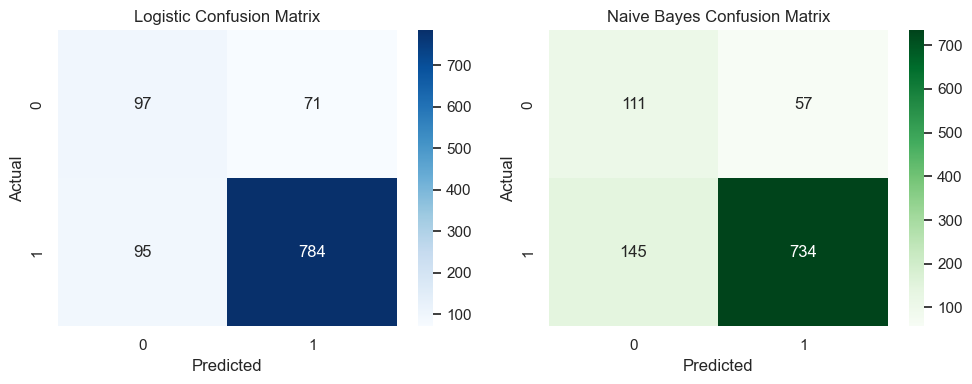

In [145]:
#plotting a confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_nb = confusion_matrix(y_test, y_pred_nb)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1) # making sure that the heatmaps are side by side (subplot(rows, cols, index))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

#### 4.1.6 Key Observations

**Logistic Regression**

- The model has a high True positive rate indicating it correctly predicted positive emotions.

- The model has a False negative value of (96) and a False positive value of (71) indicating the model was able to make correct predictions on the Negative and positive classes since the False negative rate and False positive rate are low.

**Naive Bayes**

- The model has a high True positive rate (734) indicating it correctly  predicted  positive emotions.

- The model has a low False positive rate (57) indicating it correctly identified negative emotions.

- The model has a rather high False negative rate (145) indicating that it did miss out on some of the positive emotions.


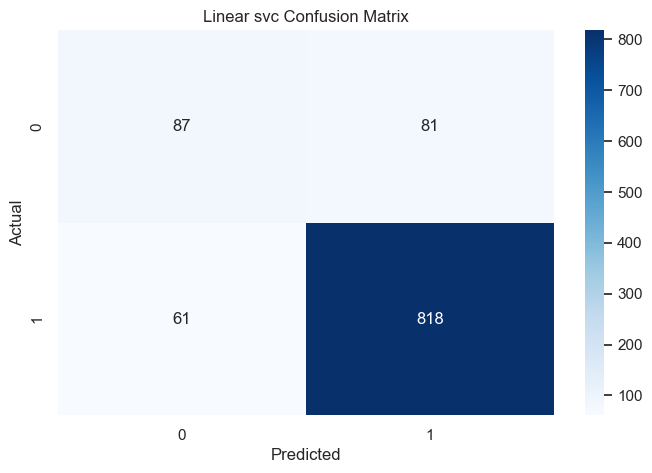

In [146]:
#confusion matrix for svc
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8,5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Linear svc Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual');

**LinearSVC**

- The  model has a high True positive rate (818) indicating it correctly identified positive emotions.

- The model has a low False positive rate (81) and low False negative rate (61) indicating the model was able to make correct predictions on the Negative and positive classes since the False negative rate and False positive rate are low.

These observations further indicates that LinearSvc was the best performing model for Binary classification.

### 4.2 Multi-Class Classification

This step involves using both the Positive, Negative and Neutral sentiments.

The steps for multi-class modeling are as follows:

1. Defining X and Y Features.

2. Encoding the labels(Positive, Negative and Neutral)

3. Split the data.

4. Train the models with each model having a baseline model and then do hyperparamater tuning to find the best model.

5. Create a pipeline that trains and tests our data. The Pipeline contains TfidfVectorizer which is a vectorizer that converts our textual data to numeric data.

6. Evaluate the models using training accuracy,validation accuracy, F1 score and ROC.

7. Plotting the Accuracy score, F1 score, ROC and Confusion matrix.

8. Save the best performing model.

In [147]:
#check for class imbalance
data['sentiment'].value_counts()

sentiment
Neutral emotion     5427
Positive emotion    2928
Negative emotion     560
Name: count, dtype: int64

In [148]:
#encoding the labels
data['sentiment_encoded'] = data['sentiment'].map({'Positive emotion': 1, 'Negative emotion': 0, 'Neutral emotion':2})
data.head()

,tweet_directed_at,sentiment,chars,words,sentences,clean_tweet,tokenized_tweet,sentiment_encoded
0,iPhone,Negative emotion,127,32,5,g iphone hr tweet riseaustin dead need upgrade...,"[g, iphone, hrs, tweeting, riseaustin, dead, n...",0
1,iPad or iPhone App,Positive emotion,139,29,3,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely...",1
2,iPad,Positive emotion,79,20,2,wait ipad also sale sxsw,"[wait, ipad, also, sale, sxsw]",1
3,iPad or iPhone App,Negative emotion,82,21,2,hope year festival isnt crashy year iphone app...,"[hope, years, festival, isnt, crashy, years, i...",0
4,Google,Positive emotion,131,29,1,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog...",1


In [149]:
#define X and y features
X = data['clean_tweet']
y = data['sentiment_encoded']

In [150]:
# #split the data
X_train, X_temp, y_train, y_temp = train_test_split(
     X, y,                # the data we want to split
     test_size=0.3,       # 30% goes to temp (val + test)
     random_state=42,     # makes sure results are the same every time
     stratify=y           # keeps class balance (happy/sad/neutral) the same
 )

 #  Now, let's cut the temp set into:
 #  - half for validation (to check how we’re doing)
 #  - half for testing (final exam for our model!)
X_val, X_test, y_val, y_test = train_test_split(
     X_temp, y_temp,      # we split the leftover data
     test_size=0.5,       # half goes to test, half to val
     random_state=42,     # keep it fair and repeatable
     stratify=y_temp      # keep class balance again
 )


In [151]:
#checking whether the training data has the same number of samples
X_train.shape, y_train.shape

((6240,), (6240,))

In [152]:
y_train.value_counts()

sentiment_encoded
2    3799
1    2049
0     392
Name: count, dtype: int64

 ### 4.2.1  Training the  Models and Hyperparameter Tuning

In this section we are going to train our classifier models with each having a baseline model and then perform hyperparameter tuning.

Our classifier models include:
1. Logistic Regression
2. Naive bayes
3. LinearSvc
4. Random Forest

In [153]:
#  Let's pick our robot models and their magic settings!
# we refer to the code below as a robot since it is able to automate between different tasks

# First, we tell Python what robot models we want to try.
# Each robot learns in a different way!

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),  # a robot that guesses yes/no smartly
    'NaiveBayes': MultinomialNB(),                            # a robot that loves counting words
    'LinearSVC': LinearSVC() ,                                # a robot that draws a line between happy/sad
    'RandomForest':RandomForestClassifier(random_state= 42)
}

#  Now, we give each robot a few "knobs" to turn — these are the *settings* we’ll test.
# We’ll try different numbers to see what makes them learn best!

params = {
    # For Logistic Regression robot:
    'LogisticRegression': {
        'tfidf__max_features': [3000, 5000],  # how many words to look at
        'model__C': [0.5, 1.0, 2.0]           # how strong or soft the learning should be
    },

    #  For Naive Bayes robot:
    'NaiveBayes': {
        'tfidf__max_features': [3000, 5000],  # same word count choices
        'model__alpha': [0.5, 1.0]            # how much to smooth (make learning less noisy)
    },

    #  For Linear SVC robot:
    'LinearSVC': {
        'tfidf__max_features': [3000, 5000],  # number of words to remember
        'model__C': [0.5, 1.0, 2.0]           # controls how strict the robot’s line is
    },
    
    #for Randomforest robot: 
    'RandomForest': {
        'tfidf__max_features': [3000, 5000],      # number of words to remember
        'model__n_estimators': [100, 200],        #the number of trees in the forest
        'model__max_depth'   : [10, 20 , None]    #how deep the tree can grow vertically
    }
}


#### 4.2.2 Creating a Pipeline

From the pipeline below, the following is possible:

1. Use F-IDF Vectorizer to convert the text data to numeric data which makes use of n-gram_range to capture the context and extract meaning from the text data. It returns a sparse matrix suitable for model training and evaluation.
   
2. Pass in each and every classifier model through a GridSearchCV.

3. Fit the different classifier models.

4. Save the best model of each classifier using joblib

5. Make predictions from the training and validation data.

6. Evaluate the different models using training and validation accuracy and F1score.

7. Calculate the AUC which represents the probability that a model will rank the positive higher than the negative.


In [154]:
#  Train and test our robots (models)

# We keep all our results here
results = {}

# We go through each robot we made before (Logistic, Naive Bayes, SVC)
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Step 1: Make a pipeline that includes tfidf, smote  and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Step 2: Try many settings for each robot
    grid = GridSearchCV(
        pipeline,
        param_grid=params[name],
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    # Step 3: Train the model
    grid.fit(X_train, y_train)

    # Step 4: Get the best model
    best_model = grid.best_estimator_
   
    #Step 5: Save the best model to disk
    joblib.dump(best_model, f'best_model_{name}.pkl')

     # Step 6: Predict on train and validation data
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)

     # Step 7: Calculate Accuracy and F1
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')

     # Step 8: Calculate AUC (only if model gives probabilities)
    try:
         y_train_prob = best_model.predict_proba(X_train)
         y_val_prob = best_model.predict_proba(X_val)
         train_auc = roc_auc_score(pd.get_dummies(y_train), y_train_prob, multi_class='ovr')
         val_auc = roc_auc_score(pd.get_dummies(y_val), y_val_prob, multi_class='ovr')
    except:
         train_auc = np.nan
         val_auc = np.nan

     # Step 9: Save results
    results[name] = {
         'model': best_model,
         'train_acc': train_acc,
         'val_acc': val_acc,
         'train_f1': train_f1,
         'val_f1': val_f1,
         'train_auc': train_auc,
         'val_auc': val_auc,
         'y_val_pred': y_val_pred,
         'y_val_true': y_val
    }

    # Step 10: Print summary
    print(f"Best settings: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.3f} | Val Accuracy: {val_acc:.3f}")
    print(f"Train F1: {train_f1:.3f} | Val F1: {val_f1:.3f}")
    print(f"Train AUC: {train_auc:.3f} | Val AUC: {val_auc:.3f}")
    
    


Training LogisticRegression...
Best settings: {'model__C': 2.0, 'tfidf__max_features': 5000}
Train Accuracy: 0.864 | Val Accuracy: 0.630
Train F1: 0.848 | Val F1: 0.542
Train AUC: 0.962 | Val AUC: 0.764

Training NaiveBayes...
Best settings: {'model__alpha': 0.5, 'tfidf__max_features': 5000}
Train Accuracy: 0.750 | Val Accuracy: 0.578
Train F1: 0.707 | Val F1: 0.504
Train AUC: 0.911 | Val AUC: 0.731

Training LinearSVC...
Best settings: {'model__C': 1.0, 'tfidf__max_features': 5000}
Train Accuracy: 0.898 | Val Accuracy: 0.625
Train F1: 0.891 | Val F1: 0.530
Train AUC: nan | Val AUC: nan

Training RandomForest...
Best settings: {'model__max_depth': None, 'model__n_estimators': 200, 'tfidf__max_features': 5000}
Train Accuracy: 0.994 | Val Accuracy: 0.657
Train F1: 0.995 | Val F1: 0.507
Train AUC: 1.000 | Val AUC: 0.761


- In the pipeline above, the validation accuracy is performed on unseen data.

- LinearSVC and Logistic Regression models  had the best validation accuracy with an accuracy of 67.2%.
- LinearSVC had the best F1 score with a score of 52.2%

In [155]:
def plot_accuracy_per_model(results):
    """
    Plots train vs validation accuracy for each model individually.
    """
    for model_name, metrics in results.items():
        plt.figure(figsize=(5,3))
        
        # get train and val accuracy
        train_acc = metrics['train_acc']
        val_acc = metrics['val_acc']
        
        # plot them
        plt.plot(['Train', 'Validation'], [train_acc, val_acc],
                 color='orange', marker='o', label='Accuracy')
        plt.plot(['Train', 'Validation'], [val_acc, val_acc],
                 color='blue', marker='o', label='Validation Accuracy')  # just to show both colors
        plt.title(f"{model_name} - Accuracy")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1)
        plt.legend(['Train (Orange)', 'Validation (Blue)'])
        plt.grid(True)
        plt.show()

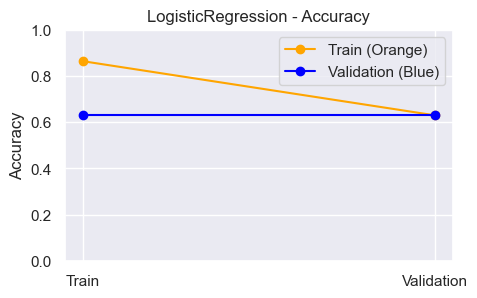

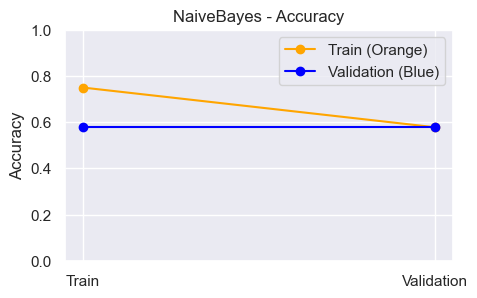

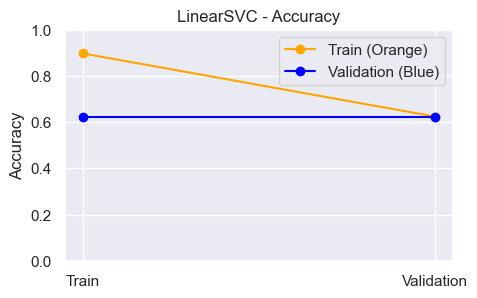

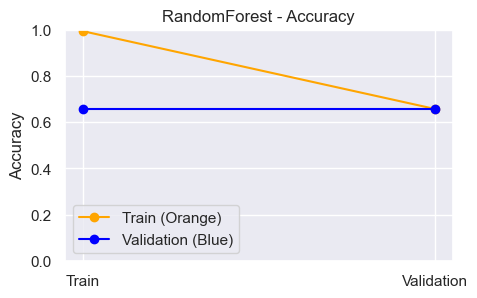

In [156]:
plot_accuracy_per_model(results)

#### 4.2.3 Key Observations

- The Logistic Regression, Naive Bayes and Linear SVC models have train and validation lines close together, meaning they learned the training data well without too much overfitting.

- Random Forest’s train accuracy plot (orange) is much higher than the validation accuracy (blue) meaning it memorized the training data too closely leading to overfitting.

- The Logistic Regression, Naive Bayes and SVC models learned the training data well and stayed balanced while the Random Forest model memorized the training data too closely which is evident given the high training accuracy score(99%) indicating the model failed to generalize well on new data.

- Logistic Regression and Naive Bayes are the most stable while Random Forest may need tuning or more data to reduce overfitting.


In [157]:
def plot_f1_per_model(results):
    """
    Plots train vs validation F1 score for each model individually.
    """
    for model_name, metrics in results.items():
        plt.figure(figsize=(5,3))
        
        # get train and val F1
        train_f1 = metrics['train_f1']
        val_f1 = metrics['val_f1']
        
        # plot them
        plt.plot(['Train', 'Validation'], [train_f1, val_f1],
                 color='orange', marker='o', label='Train F1')
        plt.plot(['Train', 'Validation'], [val_f1, val_f1],
                 color='blue', marker='o', label='Validation F1')  # just to show both colors
        plt.title(f"{model_name} - F1 Score")
        plt.ylabel("F1 Score")
        plt.ylim(0, 1)
        plt.legend(['Train (Orange)', 'Validation (Blue)'])
        plt.grid(True)
        plt.show()

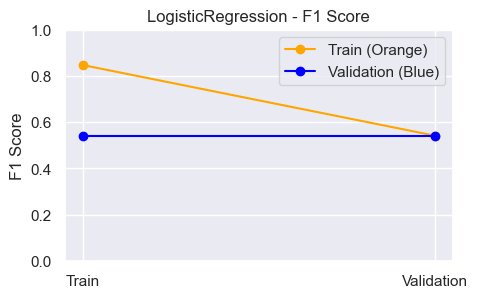

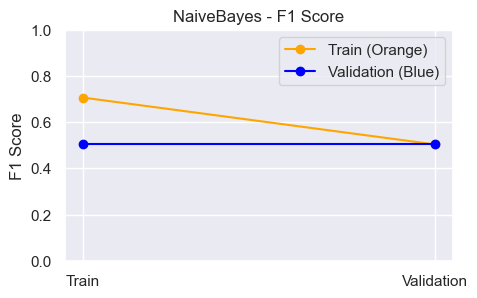

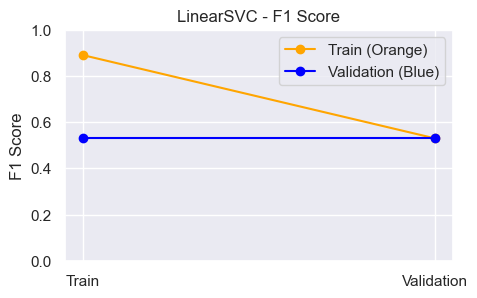

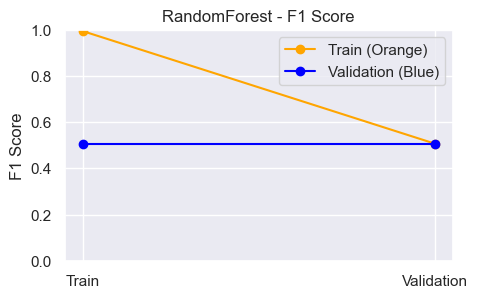

In [158]:
plot_f1_per_model(results)

#### 4.2.4 Key Observations

- In this section the Logistic Regression, Naive Bayes and SVC models still show small drops from train to validation F1 score.

- Random Forest again shows a big drop between the training and validation accuracy, meaning it did great on training data but was not able to genaralize well on unseen data.

- The first three models are fair and balanced while Random Forest memorized the data too closely leading to poor generalization on unseen data.

- The Logistic Regression model is consistent across the accuracy and F1 scores.

- The Naive Bayes model is more stable with the smallest drop between the training and Validation accuracy.

- Random Forest needs more regularization or pruning.

In [159]:
def plot_roc_curves(results):
    """
    Draws ROC curves for all models that support probability outputs.
    """
    for name, data in results.items():
        model = data['model']
        y_true = data['y_val_true']
        
        # Some models (like SVC) may not have predict_proba
        try:
            y_prob = model.predict_proba(X_val)
        except:
            print(f"Skipping {name} (no probability output).")
            continue

        classes = np.unique(y_true)

        # If only 2 classes (binary case)
        if len(classes) == 2:
            fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, color='blue', label=f'{name} (AUC = {auc(fpr, tpr):.3f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title(f'ROC Curve - {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()

        # If more than 2 classes (multi-class)
        else:
            y_true_bin = label_binarize(y_true, classes=classes)
            plt.figure(figsize=(6, 5))
            for i, cls in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
                plt.plot(fpr, tpr, label=f'{name} - {cls} (AUC={auc(fpr, tpr):.3f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title(f'Multi-Class ROC Curves - {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()

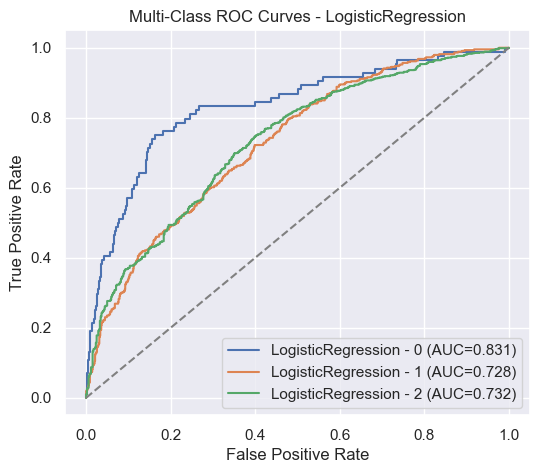

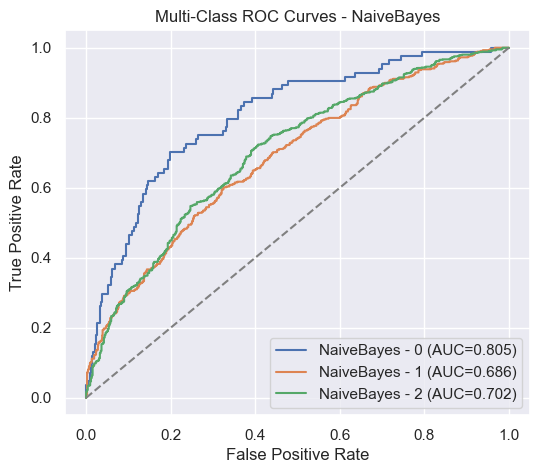

Skipping LinearSVC (no probability output).


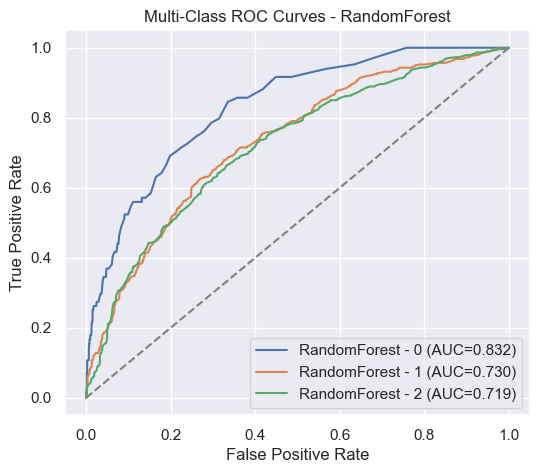

In [160]:
plot_roc_curves(results)

#### 4.2.5 Key Observations

- The Logistic Regression Model has smooth, high curves with the best AUC of around 0.85.

- The Naive Bayes and Random Forest Model follow behind with slightly lower AUCs of around 0.78.

- SVC was skipped because it does not easily give probabilities.

This means that:

- The Logistic Regression model is able to interpret the sentiments behind a twitter better than the other models making it the smartest reader.

- The Naive Bayes and Random Forest models are good, but not the best.

The Logistic Regression is the most reliable across all metrics. Naive Bayes performs decently and runs fast, while Random Forest is okay but not ideal for text-based emotion tasks.

In [161]:
def plot_confusion_matrices(results):
    for name, data in results.items():
        y_true = data['y_val_true']
        y_pred = data['y_val_pred']
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

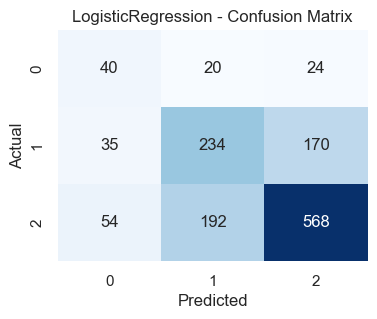

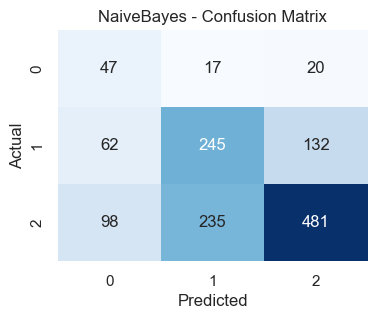

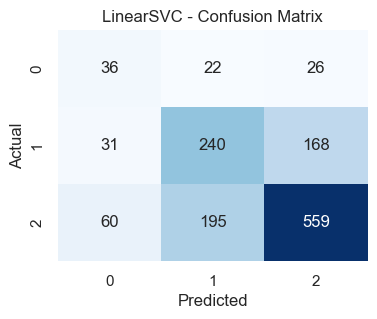

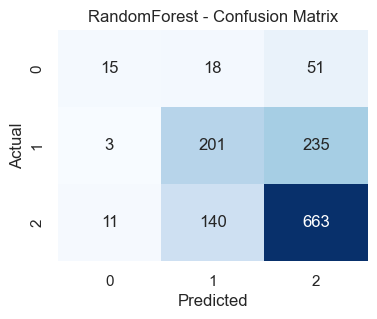

In [162]:
plot_confusion_matrices(results)

- This is a three by three confusion matrix evaluating the three classes in the 'sentiment' column with the correct predictions in the diagonal and the rest of the predictions are misclassifications

**Observation for Logistic Regression**

-  The True positive total is 905. These are the values the model correctly predicted for each and every class.

-  The False positive and False negative for the negative class is (7) and (77) respectively.

-  The False positive and False negative for the positive class is (281) and (131) respectively.

-  The False positive and False negative for the neutral class is (144) and (224) respectively.

The logistic regression model seems to be misclassifying most of the sentiments as positive.

---


**Observation for Naive Bayes**

-  The True positive total is 883. These are the values the model correctly predicted for each and every class.

-  The False positive and False negative for the negative class is (5) and (79) respectively.

-  The False positive and False negative for the positive  class is (328) and (110) respectively.

-  The False positive and False negative for the neutral class is (121) and (265) respectively.

The Naive Bayes model seems to be misclassifying most of the sentiments as positive.

---


**Observation for Linear SVC**

- The True positive total is 901. These are the values the model correctly predicted for each and every class.

- The False positive and False negative for the negative class is (15) and (74) respectively.

- The False positive and False negative for the positive class is (265) and (139) respectively.

- The False positive and False negative for the neutral class is (148) and (215) respectively.

The Linear SVC model seems to be misclassifying most of the sentiments as positive.

---


**Observation for RandomForest**

- The True positive total is 909. These are the values the model correctly predicted for each and every class.

- The False positive and False negative for the negative class is (12) and (71) respectively.

- The False positive and False negative for the positive class is (319) and (105) respectively.

-  The False positive and False negative for the neutral class is (165) and (260) respectively.

The Random Forest seems to be misclassifying most of the sentiments as positive. 

---


## 5. Data Modeling Overview

The section focused on both Binary and Multi-class classification as follows:

**In Binary Classification the following steps were followed:**

1. Used Positive and Negative emotions.

2. Encoded the classes into a column called sentiment encoded.

3. Converted the text data into numeric data using TFidf vectorizer.

4. Solved for class imbalance using Synthetic Minority Oversampling Technique (SMOTE).

5. Split the data into training and test sets.

6. Fitted a Logistic regression, Naive bayes and a Support vector machine learning model.

7. Evaluated the models using Precision, F1 Score, Recall and Accuracy Score.

8. Plotted a confusion matrix for easy interpretation.


**In Multi-Class Classification the following steps were followed:**

1. Split the data into training, temporary, validation and test data.

2. Trained the models with each model having a baseline model and then did hyperparamater tuning to find the best model.

3. Created a pipeline that trains and tests the data. The Pipeline contains TfidfVectorizer which is a vectorizer that converts the textual data to numeric data. It also fits the models.

4. Evaluated the models using Training accuracy, Validation accuracy, F1 score and ROC.

5. Plottted the Accuracy score, F1 score, ROC and Confusion matrix.

---


## 6. Model Evaluation Overview 

This section focused on model evaluation as follows:

**In Binary Classification:**

1. The classification report was used to show the Precision, Recall and F1 Score of the three classification models.

2. The models were evaluated using Accuracy Score, where the LinearSvc had the best test accuracy score of 86%.


**In Multi-Class Classification:**
1. A pipeline was used to iterate over the different models and give the training accuracy, validation accuracy, f1 score and ROC.

2. All the classification models had a good validation accuracy with LinearSVC having the best validation accuracy of 67.2%.

3. The models were evaluated using f1 score with LinearSvc having the best f1 score of 52.2%.

4. The Logistic Regression model had the best ROC curve.

5. The Random Forest ensemble had a training accuracy of 99% indicating it memorized the data too well. However, it overfitted possibly due to having a small dataset.

---

## 7. Saving the best model

In this section we made use of **Joblib** to load the best performing classifier model and **Pickle** to create a filename "Trained model sav"

In [163]:
# Loading the svc model since it had a better f1 score and validation accuracy than the rest
model_name = 'LinearSVC'  
loaded_model = joblib.load(f'best_model_{model_name}.pkl')
loaded_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('smote', SMOTE(random_state=42)), ('model', LinearSVC())])

In [164]:
#making predictions with a string
X_new = ['I love music']
predictions = loaded_model.predict(X_new)
print(f"Predictions for {model_name}: {predictions}")

Predictions for LinearSVC: [1]


* The LinearSvc model correctly predicted this as a positive emotion.

Now we're going to making new predictions from our dataset as you can see from the code above that text data (8919) has a neutral emotion

In [165]:
#creating a file name with pickle
filename= 'trained_model.sav'
pickle.dump(loaded_model, open(filename, 'wb'))

In [166]:
#loading the filename
pkl_loaded_model= pickle.load(open('trained_model.sav','rb'))

## 7. Conclusion

This Twitter sentiment analysis project has provided valuable insights into the challenges and opportunities of automated sentiment classification for Apple and Google products. The analysis encompassed both binary and multi-class classification approaches, revealing important patterns about social media sentiment and model performance.

In both the binary and multi-class appproach linear Support Vector Classifier emerged as the best performing model, delivering the
highest accuracy on unseen data with balanced errors across classes. This model can therefore be used  to make new predictions. In the multi-class approach  the models were prone to misclassifying negative and neutral emotions as positive emotion, thus Apple and Google should make sure to improve on the products with bad reviews as well as find ways to improve on the products with good reviews to cater for the misclassification so as to ensure customer satisfaction.